<a href="https://colab.research.google.com/github/sathwika2086/j-cmp1/blob/main/dfml2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from math import sqrt
import statsmodels.api as statsmodel
import os
%matplotlib inline

In [5]:
df=pd.read_csv('/content/fmlf.csv')

In [6]:
df

,Gender,Age,Course,Studying year,Score,Marital status,Any depression,Anxiety,Past Trauma,Stress,Insomnia,Agoraphobia,Abuses/Discriminations,Confident levels,Result
0,Female,18,Degree,year 1,40-50,No,Yes,No,Yes,No,Yes,Yes,Yes,Low,0
1,Male,21,Degree,year 2,50-60,No,No,Yes,No,No,Yes,No,No,Low,0
2,Male,19,Degree,Year 1,60-70,No,Yes,Yes,Yes,No,Yes,Yes,No,Low,1
3,Female,22,Engineering,year 3,70-80,Yes,Yes,No,No,No,No,No,Yes,Good,0
4,Male,23,Degree,year 4,80-90,No,No,No,No,No,No,No,Yes,High,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,Female,25,Engineering,year2,80-90,Yes,Yes,No,No,No,No,Yes,Yes,Good,1
1015,Male,23,Degree,year4,90-100,Yes,Yes,No,No,No,Yes,No,Yes,Good,1
1016,Female,25,Engineering,year 1,30-40,Yes,No,Yes,No,Yes,Yes,Yes,No,High,1
1017,Male,19,Degree,Year 3,40-50,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,High,0


In [7]:
df_getdummy=pd.get_dummies(data=df,columns=['Gender'])
X=df_getdummy.drop('Result',axis=1)
Y=df_getdummy['Result']

In [8]:
#exploratory data analysis
#It gives dimensions of the dataset
df.shape


(1019, 15)

In [9]:
df.dtypes

Gender                    object
Age                        int64
Course                    object
Studying year             object
Score                     object
Marital status            object
Any depression            object
Anxiety                   object
Past Trauma               object
Stress                    object
Insomnia                  object
Agoraphobia               object
Abuses/Discriminations    object
Confident levels          object
Result                     int64
dtype: object

In [10]:
df.columns

Index(['Gender', 'Age', 'Course', 'Studying year', 'Score', 'Marital status',
       'Any depression', 'Anxiety', 'Past Trauma', 'Stress', 'Insomnia',
       'Agoraphobia', 'Abuses/Discriminations', 'Confident levels', 'Result'],
      dtype='object')

In [11]:
df.describe()

,Age,Result
count,1019.000000,1019.000000
mean,20.861629,0.498528
std,2.641197,0.500243
min,0.000000,0.000000
25%,19.000000,0.000000
50%,21.000000,0.000000
75%,23.000000,1.000000
max,25.000000,1.000000


In [12]:
df.head(2)

,Gender,Age,Course,Studying year,Score,Marital status,Any depression,Anxiety,Past Trauma,Stress,Insomnia,Agoraphobia,Abuses/Discriminations,Confident levels,Result
0,Female,18,Degree,year 1,40-50,No,Yes,No,Yes,No,Yes,Yes,Yes,Low,0
1,Male,21,Degree,year 2,50-60,No,No,Yes,No,No,Yes,No,No,Low,0


In [13]:
df.nunique()

Gender                     3
Age                       10
Course                     2
Studying year             10
Score                      7
Marital status             2
Any depression             2
Anxiety                    2
Past Trauma                2
Stress                     2
Insomnia                   2
Agoraphobia                2
Abuses/Discriminations     2
Confident levels           4
Result                     2
dtype: int64

In [14]:
df.count()

Gender                    1019
Age                       1019
Course                    1019
Studying year             1016
Score                     1019
Marital status            1019
Any depression            1019
Anxiety                   1018
Past Trauma               1019
Stress                    1019
Insomnia                  1016
Agoraphobia               1019
Abuses/Discriminations    1018
Confident levels          1019
Result                    1019
dtype: int64

In [15]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Age       20.861629
Result     0.498528
dtype: float64

In [16]:
df.min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Gender                #$#@
Age                      0
Course              Degree
Score                30-40
Marital status          No
Any depression          No
Past Trauma             No
Stress                  No
Agoraphobia             No
Confident levels      Good
Result                   0
dtype: object

In [17]:
df.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Gender                     Male
Age                          25
Course              Engineering
Score                    90-100
Marital status              Yes
Any depression              Yes
Past Trauma                 Yes
Stress                      Yes
Agoraphobia                 Yes
Confident levels            Nan
Result                        1
dtype: object

In [ ]:
df.memory_usage()

Index                      128
Gender                    8152
Age                       8152
Course                    8152
Studying year             8152
Score                     8152
Marital status            8152
Any depression            8152
Anxiety                   8152
Past Trauma               8152
Stress                    8152
Insomnia                  8152
Agoraphobia               8152
Abuses/Discriminations    8152
Confident levels          8152
Result                    8152
dtype: int64

In [ ]:
df.corr()

,Age,Result
Age,1.000000,-0.000526
Result,-0.000526,1.000000


In [ ]:
df.isna().all()

Gender                    False
Age                       False
Course                    False
Studying year             False
Score                     False
Marital status            False
Any depression            False
Anxiety                   False
Past Trauma               False
Stress                    False
Insomnia                  False
Agoraphobia               False
Abuses/Discriminations    False
Confident levels          False
Result                    False
dtype: bool

In [18]:
df.isna().any()

Gender                    False
Age                       False
Course                    False
Studying year              True
Score                     False
Marital status            False
Any depression            False
Anxiety                    True
Past Trauma               False
Stress                    False
Insomnia                   True
Agoraphobia               False
Abuses/Discriminations     True
Confident levels          False
Result                    False
dtype: bool

In [19]:
dn=df.fillna(0)
dn

,Gender,Age,Course,Studying year,Score,Marital status,Any depression,Anxiety,Past Trauma,Stress,Insomnia,Agoraphobia,Abuses/Discriminations,Confident levels,Result
0,Female,18,Degree,year 1,40-50,No,Yes,No,Yes,No,Yes,Yes,Yes,Low,0
1,Male,21,Degree,year 2,50-60,No,No,Yes,No,No,Yes,No,No,Low,0
2,Male,19,Degree,Year 1,60-70,No,Yes,Yes,Yes,No,Yes,Yes,No,Low,1
3,Female,22,Engineering,year 3,70-80,Yes,Yes,No,No,No,No,No,Yes,Good,0
4,Male,23,Degree,year 4,80-90,No,No,No,No,No,No,No,Yes,High,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,Female,25,Engineering,year2,80-90,Yes,Yes,No,No,No,No,Yes,Yes,Good,1
1015,Male,23,Degree,year4,90-100,Yes,Yes,No,No,No,Yes,No,Yes,Good,1
1016,Female,25,Engineering,year 1,30-40,Yes,No,Yes,No,Yes,Yes,Yes,No,High,1
1017,Male,19,Degree,Year 3,40-50,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,High,0


In [20]:
dn.isna().sum()

Gender                    0
Age                       0
Course                    0
Studying year             0
Score                     0
Marital status            0
Any depression            0
Anxiety                   0
Past Trauma               0
Stress                    0
Insomnia                  0
Agoraphobia               0
Abuses/Discriminations    0
Confident levels          0
Result                    0
dtype: int64

In [21]:
a=df['Age'].unique()
a

array([18, 21, 19, 22, 23, 20, 24,  0, 25, 17])

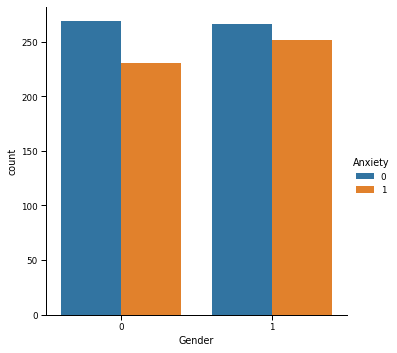

In [60]:
sns.catplot(x='Gender',hue='Anxiety',kind='count',data=df)

In [25]:
df.drop(df[df['Gender']=='#$#@'].index,inplace= True )

In [ ]:
df.Gender

0       Female
1         Male
2         Male
3       Female
4         Male
         ...  
1014    Female
1015      Male
1016    Female
1017      Male
1018    Female
Name: Gender, Length: 1019, dtype: object

In [26]:
#visualization
print(df.Gender.value_counts)

<bound method IndexOpsMixin.value_counts of 0       Female
1         Male
2         Male
3       Female
4         Male
         ...  
1014    Female
1015      Male
1016    Female
1017      Male
1018    Female
Name: Gender, Length: 1018, dtype: object>


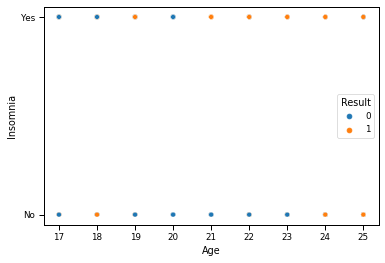

In [27]:
sns.set_context("paper")
sns.scatterplot(data=df, x='Age', y='Insomnia', hue='Result')

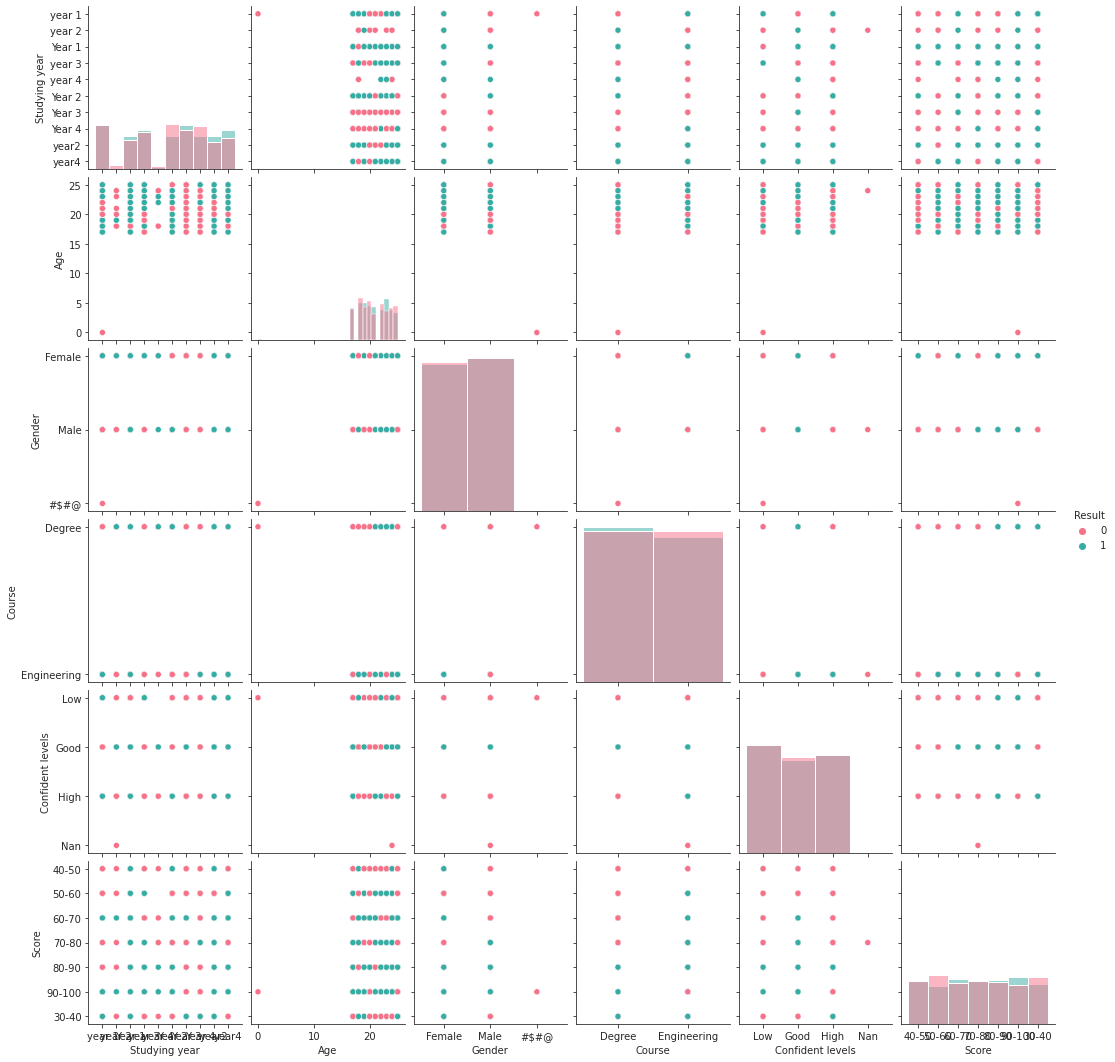

In [ ]:
sns.set_style("ticks")
sns.pairplot(df,x_vars={'Gender','Age','Course','Studying year','Score','Confident levels'},y_vars={'Gender','Age','Course','Studying year','Score','Confident levels'},hue='Result',diag_kind="hist",kind="scatter",palette="husl")
plt.show()

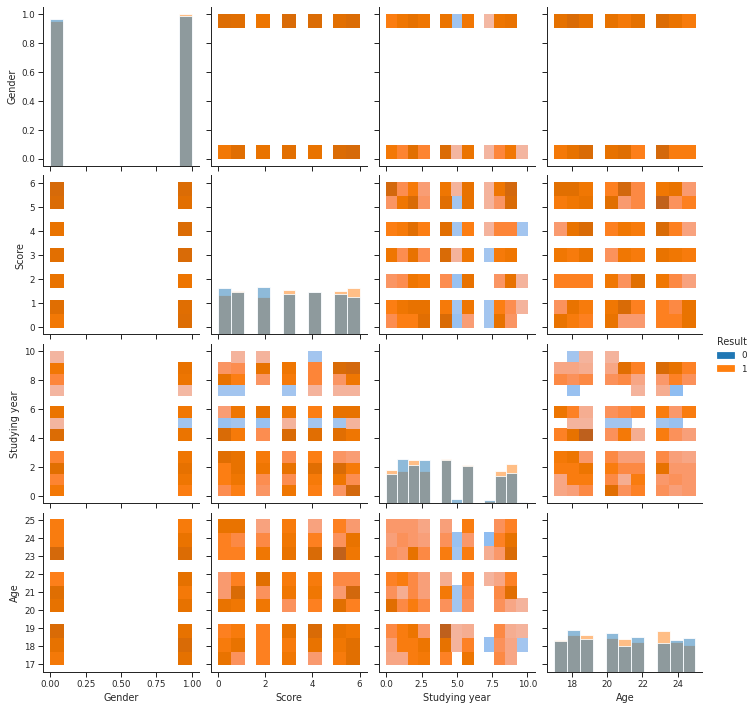

In [61]:
sns.set_style("ticks")
sns.pairplot(df,x_vars={'Gender','Age','Studying year','Score'},y_vars={'Gender','Age','Studying year','Score'},hue='Result',kind="hist")
plt.show()

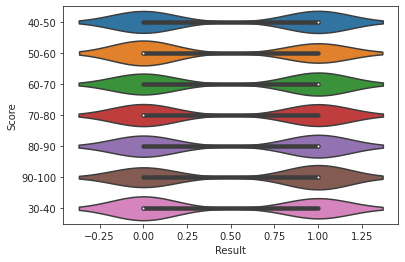

In [ ]:
sns.violinplot(data=df,x='Result',y='Score')

In [64]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend( )

NameError: ignored

<Figure size 864x432 with 0 Axes>

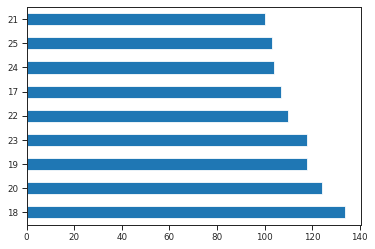

In [69]:
df.Age.value_counts().plot.barh()


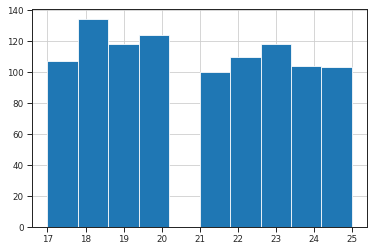

In [70]:
df.Age.hist()

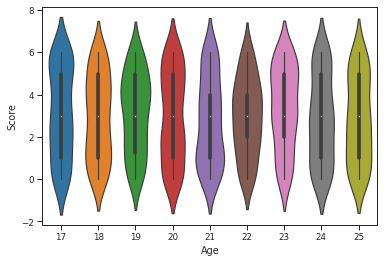

In [72]:
sns.violinplot(x='Age',y='Score',data=df)

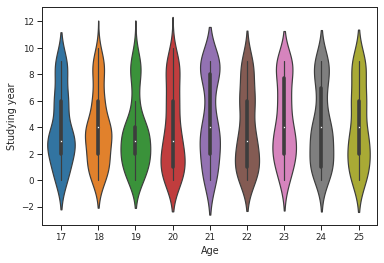

In [73]:
sns.violinplot(x='Age',y='Studying year',data=df)

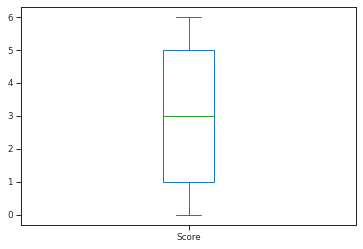

In [76]:
df.Score.plot.box()

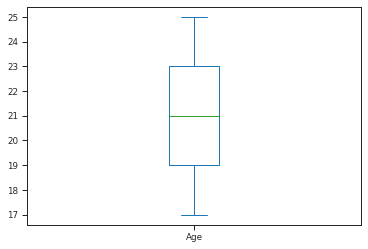

In [77]:
df.Age.plot.box()

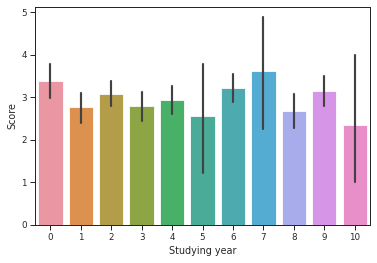

In [79]:
sns.barplot(x='Studying year',y='Score',data=df)

In [28]:
#function for converting yes or no
def clean_string(x):
    if x == 'Yes':
        return 1
    else:
        return 0

In [29]:
df['Anxiety']=df['Anxiety'].apply(clean_string)
df['Marital status']=df['Marital status'].apply(clean_string)
df['Any depression']=df['Any depression'].apply(clean_string)
df['Stress']=df['Stress'].apply(clean_string)
df['Insomnia']=df['Insomnia'].apply(clean_string)
df['Agoraphobia']=df['Agoraphobia'].apply(clean_string)
df['Abuses/Discriminations']=df['Abuses/Discriminations'].apply(clean_string)
df['Past Trauma']=df['Past Trauma'].apply(clean_string)



In [30]:
df


,Gender,Age,Course,Studying year,Score,Marital status,Any depression,Anxiety,Past Trauma,Stress,Insomnia,Agoraphobia,Abuses/Discriminations,Confident levels,Result
0,Female,18,Degree,year 1,40-50,0,1,0,1,0,1,1,1,Low,0
1,Male,21,Degree,year 2,50-60,0,0,1,0,0,1,0,0,Low,0
2,Male,19,Degree,Year 1,60-70,0,1,1,1,0,1,1,0,Low,1
3,Female,22,Engineering,year 3,70-80,1,1,0,0,0,0,0,1,Good,0
4,Male,23,Degree,year 4,80-90,0,0,0,0,0,0,0,1,High,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,Female,25,Engineering,year2,80-90,1,1,0,0,0,0,1,1,Good,1
1015,Male,23,Degree,year4,90-100,1,1,0,0,0,1,0,1,Good,1
1016,Female,25,Engineering,year 1,30-40,1,0,1,0,1,1,1,0,High,1
1017,Male,19,Degree,Year 3,40-50,1,1,1,1,1,0,1,1,High,0


In [31]:
df['Course']=df['Course'].apply(clean_string)
df

,Gender,Age,Course,Studying year,Score,Marital status,Any depression,Anxiety,Past Trauma,Stress,Insomnia,Agoraphobia,Abuses/Discriminations,Confident levels,Result
0,Female,18,0,year 1,40-50,0,1,0,1,0,1,1,1,Low,0
1,Male,21,0,year 2,50-60,0,0,1,0,0,1,0,0,Low,0
2,Male,19,0,Year 1,60-70,0,1,1,1,0,1,1,0,Low,1
3,Female,22,0,year 3,70-80,1,1,0,0,0,0,0,1,Good,0
4,Male,23,0,year 4,80-90,0,0,0,0,0,0,0,1,High,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,Female,25,0,year2,80-90,1,1,0,0,0,0,1,1,Good,1
1015,Male,23,0,year4,90-100,1,1,0,0,0,1,0,1,Good,1
1016,Female,25,0,year 1,30-40,1,0,1,0,1,1,1,0,High,1
1017,Male,19,0,Year 3,40-50,1,1,1,1,1,0,1,1,High,0


In [35]:
df_exclude_numeric=df.select_dtypes(exclude=np.number).columns

In [37]:
df_exclude_numeric

Index(['Gender', 'Studying year', 'Score', 'Confident levels'], dtype='object')

In [36]:
df[df_exclude_numeric].head()

,Gender,Studying year,Score,Confident levels
0,Female,year 1,40-50,Low
1,Male,year 2,50-60,Low
2,Male,Year 1,60-70,Low
3,Female,year 3,70-80,Good
4,Male,year 4,80-90,High


In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
label_encoder = LabelEncoder()

In [41]:
for i in df_exclude_numeric:
  df[i] = label_encoder.fit_transform(df[i])
  print("Encoded data")
  df.head()

Encoded data
Encoded data
Encoded data
Encoded data


In [42]:
df

,Gender,Age,Course,Studying year,Score,Marital status,Any depression,Anxiety,Past Trauma,Stress,Insomnia,Agoraphobia,Abuses/Discriminations,Confident levels,Result
0,0,18,0,4,1,0,1,0,1,0,1,1,1,2,0
1,1,21,0,5,2,0,0,1,0,0,1,0,0,2,0
2,1,19,0,0,3,0,1,1,1,0,1,1,0,2,1
3,0,22,0,6,4,1,1,0,0,0,0,0,1,0,0
4,1,23,0,7,5,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,0,25,0,8,5,1,1,0,0,0,0,1,1,0,1
1015,1,23,0,9,6,1,1,0,0,0,1,0,1,0,1
1016,0,25,0,4,0,1,0,1,0,1,1,1,0,1,1
1017,1,19,0,2,1,1,1,1,1,1,0,1,1,1,0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

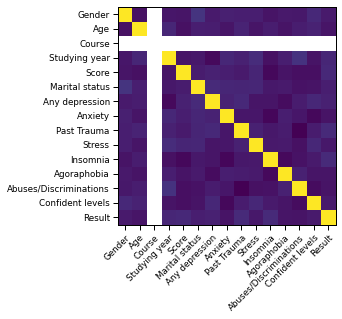

In [44]:
corr=df.corr()
fig, ax=plt.subplots()
#heatmap
im=ax.imshow(corr.values)
#setting labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.setp(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode="anchor")

(15.5, -0.5)

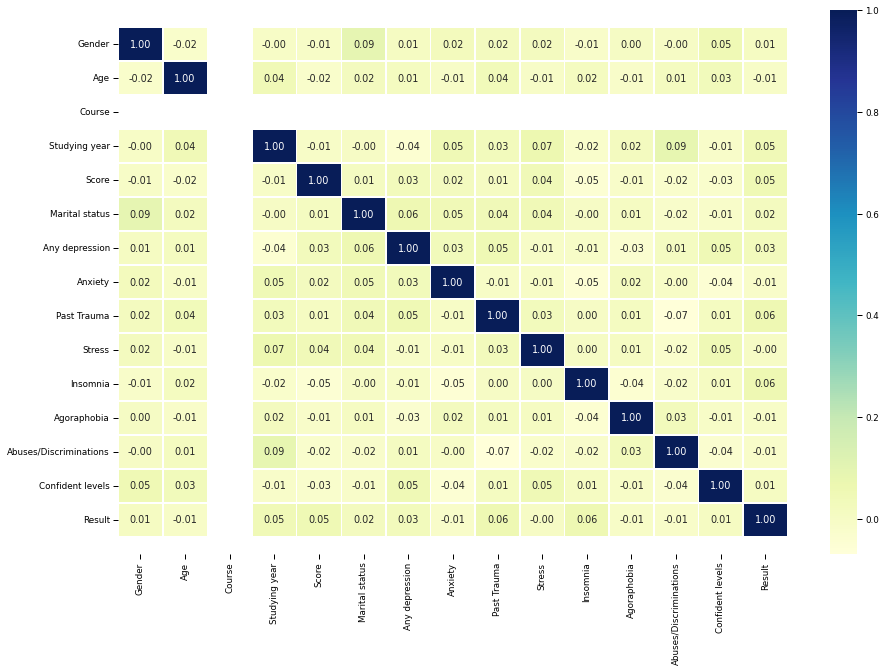

In [45]:

corr_matrix = df.corr()
fig, ax =plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
annot =True,
linewidths=0.5,
fmt=".2f",
cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

In [81]:
'''cm = confusion_matrix(y_test, y_pred)
group_names = ['True Negative','False Positive','False Negative','TruePositive']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percent
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot = labels, fmt = '', cmap='Blues', cbar = False)
plt.gcf().set_size_inches(8,5)
plt.title('Confusion Matrix for Logistic Regression', fontsize = 20)
plt.show()'''

SyntaxError: ignored

In [ ]:
#plt.figure(figsize=(12,6))
#plt.plot(frame['max_depth'], frame['train_acc'], marker='0')
#plt.plot(frame['max_depth'], frame['valid_acc'],marker='0')
#plt.xlabel('Depth of tree')
#plt.ylabel('performance')
#plt.legend()//

In [ ]:
#from tkinter import Frame
#plt.figure(figsize=(12,6))
#plt.plot(frame['max_depth'], frame['train_acc'], marker='0')
#plt.plot(frame['max_depth'], frame['valid_acc'],marker='0')
#plt.xlabel('Depth of tree')
#plt.ylabel('performance')
#plt.legend()

In [32]:
from  sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
sst=StandardScaler()
from sklearn.preprocessing import LabelEncoder
#importing

In [ ]:
  #standardizing
data_scaled=df.iloc[:,:-1].values
data_scaled= sst.fit_transform(data_scaled)
data_scaled=pd.DataFrame(data_scaled)
#ata_scaled.columns=['Gender',' Age','Course','Studying year','Score','Marital status','Any depression','Anxiety','Past Trauma','Stress','Insomnia','Agoraphobia','Abuses/Discriminations','Confident','Result']
#data_scaled.head()

In [ ]:
x=data_scaled.iloc[:,0:13]
y=data_scaled.iloc[:,13:14]

In [ ]:
from  sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
sst=StandardScaler()
#from sklearn.preprocessing import LabelEncoder
#importing

In [47]:
data_scaled=df.iloc[:,:-1].values
data_scaled= sst.fit_transform(data_scaled)
data_scaled=pd.DataFrame(data_scaled)
data_scaled.columns=['Gender',' Age','Course','Studying year','Score','Marital status','Any depression','Anxiety','Past Trauma','Stress','Insomnia','Agoraphobia','Abuses/Discriminations','Confident']
data_scaled.head()

,Gender,Age,Course,Studying year,Score,Marital status,Any depression,Anxiety,Past Trauma,Stress,Insomnia,Agoraphobia,Abuses/Discriminations,Confident
0,-1.017841,-1.126311,0.0,-0.027391,-0.994978,-0.924273,1.007890,-0.950160,1.050384,-0.967141,1.0,1.007890,0.969045,1.157047
1,0.982472,0.046066,0.0,0.312663,-0.494787,-0.924273,-0.992172,1.052454,-0.952033,-0.967141,1.0,-0.992172,-1.031944,1.157047
2,0.982472,-0.735519,0.0,-1.387610,0.005405,-0.924273,1.007890,1.052454,1.050384,-0.967141,1.0,1.007890,-1.031944,1.157047
3,-1.017841,0.436858,0.0,0.652718,0.505596,1.081931,1.007890,-0.950160,-0.952033,-0.967141,-1.0,-0.992172,0.969045,-1.276577
4,0.982472,0.827650,0.0,0.992773,1.005788,-0.924273,-0.992172,-0.950160,-0.952033,-0.967141,-1.0,-0.992172,0.969045,-0.059765


In [48]:
 data_scaled['class']=df.Result
data_scaled
 #data_scaled = data_scaled[data_scaled['class'].notna()]
  #loading the data
#x = data_scaled.iloc[:,0:13]
#y = data_scaled.iloc[:,13:14]

,Gender,Age,Course,Studying year,Score,Marital status,Any depression,Anxiety,Past Trauma,Stress,Insomnia,Agoraphobia,Abuses/Discriminations,Confident,class
0,-1.017841,-1.126311,0.0,-0.027391,-0.994978,-0.924273,1.007890,-0.950160,1.050384,-0.967141,1.0,1.007890,0.969045,1.157047,0.0
1,0.982472,0.046066,0.0,0.312663,-0.494787,-0.924273,-0.992172,1.052454,-0.952033,-0.967141,1.0,-0.992172,-1.031944,1.157047,0.0
2,0.982472,-0.735519,0.0,-1.387610,0.005405,-0.924273,1.007890,1.052454,1.050384,-0.967141,1.0,1.007890,-1.031944,1.157047,1.0
3,-1.017841,0.436858,0.0,0.652718,0.505596,1.081931,1.007890,-0.950160,-0.952033,-0.967141,-1.0,-0.992172,0.969045,-1.276577,0.0
4,0.982472,0.827650,0.0,0.992773,1.005788,-0.924273,-0.992172,-0.950160,-0.952033,-0.967141,-1.0,-0.992172,0.969045,-0.059765,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,-1.017841,1.609235,0.0,1.332827,1.005788,1.081931,1.007890,-0.950160,-0.952033,-0.967141,-1.0,1.007890,0.969045,-1.276577,0.0
1014,0.982472,0.827650,0.0,1.672882,1.505980,1.081931,1.007890,-0.950160,-0.952033,-0.967141,1.0,-0.992172,0.969045,-1.276577,1.0
1015,-1.017841,1.609235,0.0,-0.027391,-1.495170,1.081931,-0.992172,1.052454,-0.952033,1.033976,1.0,1.007890,-1.031944,-0.059765,1.0
1016,0.982472,-0.735519,0.0,-0.707501,-0.994978,1.081931,1.007890,1.052454,1.050384,1.033976,-1.0,1.007890,0.969045,-0.059765,1.0


In [49]:
x = data_scaled.iloc[:,0:13]
y = data_scaled.iloc[:,13:14]

In [50]:
from sklearn.model_selection import train_test_split
ize=0.25,random_state=3)split(x,X_train,X_test,y_train,y_test=train_test_y,test_s

In [57]:
X_train

array([[ 0.9779623 , -0.71564244,  0.        , ...,  1.00131148,
        -1.01985634, -0.98827321],
       [-1.02253431,  0.06218545,  0.        , ..., -0.99869024,
         0.98053026, -0.98827321],
       [-1.02253431,  1.61784124,  0.        , ...,  1.00131148,
         0.98053026,  1.01186594],
       ...,
       [-1.02253431, -1.49347033,  0.        , ...,  1.00131148,
         0.98053026, -0.98827321],
       [ 0.9779623 ,  1.22892729,  0.        , ...,  1.00131148,
        -1.01985634, -0.98827321],
       [ 0.9779623 ,  1.61784124,  0.        , ..., -0.99869024,
         0.98053026, -0.98827321]])

In [54]:
from  sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
sc=StandardScaler()
#from sklearn.preprocessing import LabelEncoder
#importing
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [84]:
from  sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

In [83]:
from  sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: ignored

In [ ]:
from  sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

In [ ]:
#predict the test result
#y_pred=classifie
y_pred=classifier.predict(X_test)

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train,y_train)
#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred_dec=dt.predict(X_test)
cm=confusion_matrix(y_test,y_pred_dec)
print('Confusion Matrix:\n',cm)
#checking accuracy
from sklearn.metrics import accuracy_score
dta=accuracy_score(y_test,y_pred_dec)
print('accuracy score=',dta)

ValueError: ignored